In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [3]:
df = pd.read_csv("../data/processed/delhi_traffic_filtered.csv")
df.head()

,speed,free_flow,traffic_volume,confidence,lanes,maxspeed,temp,humidity,pressure,wind_speed,hour,day,highway
0,19,34,15,1.0,NaN,NaN,15.99,67,1017,0,20,1,2
1,19,34,15,1.0,NaN,NaN,15.86,63,1017,0,20,1,2
2,19,34,15,1.0,NaN,NaN,15.76,63,1017,0,20,1,2
3,19,34,15,1.0,NaN,NaN,15.73,63,1017,0,20,1,2
4,19,34,15,1.0,NaN,NaN,15.82,63,1017,0,20,1,2


In [4]:
df["is_rush_hour"]=(
    ((df["hour"]>=8) & (df["hour"]<=11)) |
    ((df["hour"]>=17) & (df["hour"]<=21))
).astype(int)

df["is_weekend"]=(df["day"]>=5).astype(int)

df[["hour", "day", "is_rush_hour", "is_weekend"]].head(10)


,hour,day,is_rush_hour,is_weekend
0,20,1,1,0
1,20,1,1,0
2,20,1,1,0
3,20,1,1,0
4,20,1,1,0
5,20,1,1,0
6,20,1,1,0
7,20,1,1,0
8,20,1,1,0
9,20,1,1,0


In [5]:

y=df["speed"]
x= df.drop(columns=[
    "traffic_volume",
    "speed",
    "free_flow"
])

print(x.columns)


Index(['confidence', 'lanes', 'maxspeed', 'temp', 'humidity', 'pressure',
       'wind_speed', 'hour', 'day', 'highway', 'is_rush_hour', 'is_weekend'],
      dtype='object')


In [6]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
model=RandomForestRegressor(n_estimators=100,random_state=42)

model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [8]:
y_pred=model.predict(x_test)

In [9]:
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("MAE:", mae)
print("R2 score:", r2)

MAE: 3.6042102873977875
R2 score: 0.5750108727846015


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

importances = pd.Series(
    model.feature_importances_,
    index=x.columns
).sort_values(ascending=False)

importances

highway         0.873278
temp            0.108261
humidity        0.018461
confidence      0.000000
lanes           0.000000
maxspeed        0.000000
pressure        0.000000
wind_speed      0.000000
hour            0.000000
day             0.000000
is_rush_hour    0.000000
is_weekend      0.000000
dtype: float64

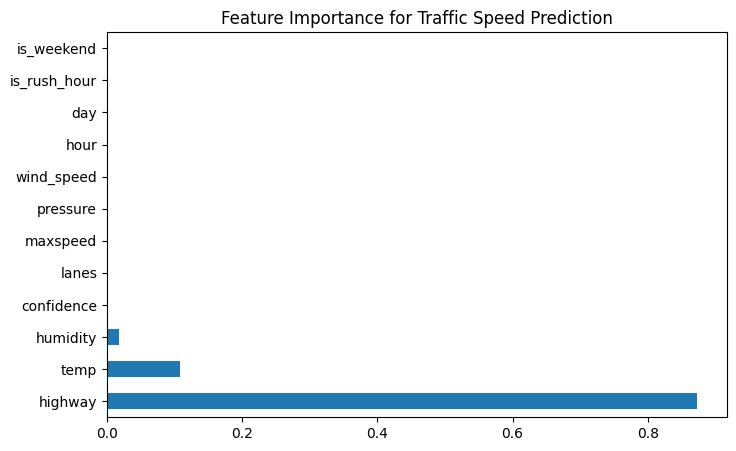

In [11]:
importances.plot(kind="barh", figsize=(8,5))
plt.title("Feature Importance for Traffic Speed Prediction")
plt.show()